# Bike Sharing Assignment

## Problem Statement :

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

In [2]:
# Reading the data

bike_data = pd.read_csv('day.csv')

## Data Understanding

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_data.shape

(730, 16)

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Since the difference between mean and median is not much , we can conclude that data has no outliers

In [10]:
print(bike_data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


## Data Preparation

In [11]:
#checking for null values in dataset

print(bike_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
bike_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


#### Dropping few columns

1. We can see that instant is an index column so we drop it.
2. We can see column dteday and yr month are having same data so we can drop dteday to avoid confusion.
3. We know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered.

In [13]:
bike_data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# From data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
# We will map season,weekday and weathersit with appropriate values

In [15]:
bike_data.season = bike_data.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
bike_data.weekday = bike_data.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
bike_data.head(15)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,1,0,Thursday,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,1,0,Friday,1,Mist & Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,1,0,Saturday,0,Mist & Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,1,0,Sunday,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,1,0,Monday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [16]:
# Converting mnth into categorical data
import calendar
bike_data['mnth'] = bike_data['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_data.head(15)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,Jan,0,Thursday,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,Jan,0,Friday,1,Mist & Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,Jan,0,Sunday,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,Jan,0,Monday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


## Exploratory Data Analysis

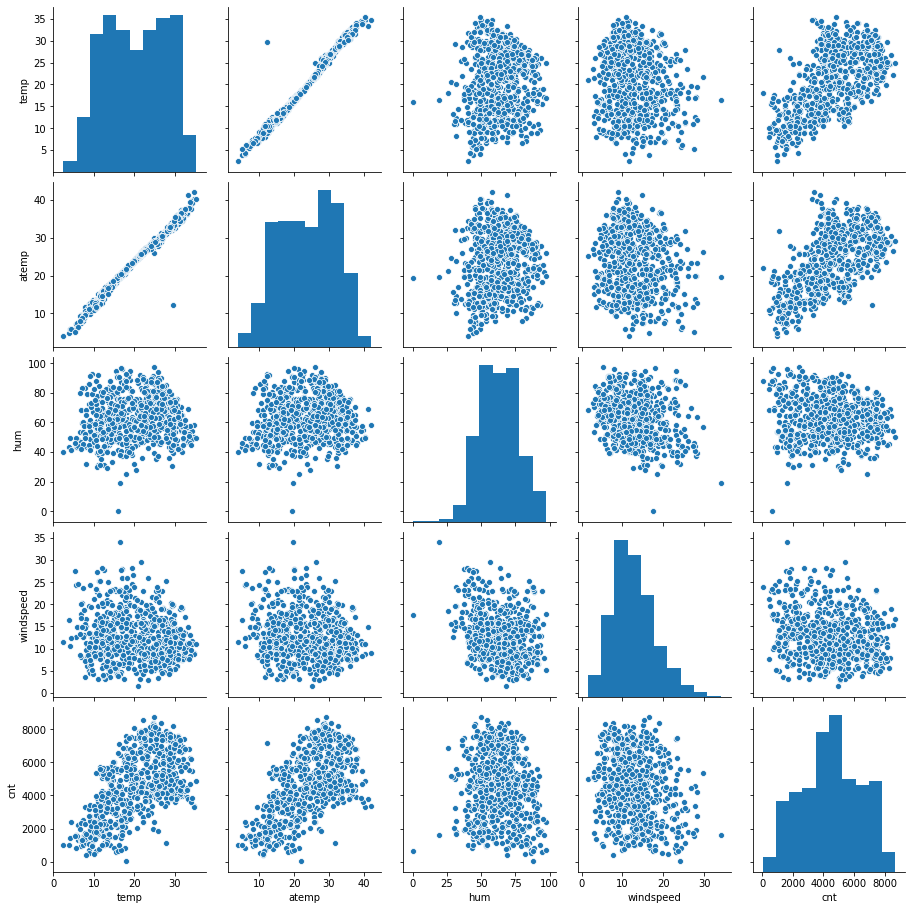

In [17]:
# PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES
sns.pairplot(bike_data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

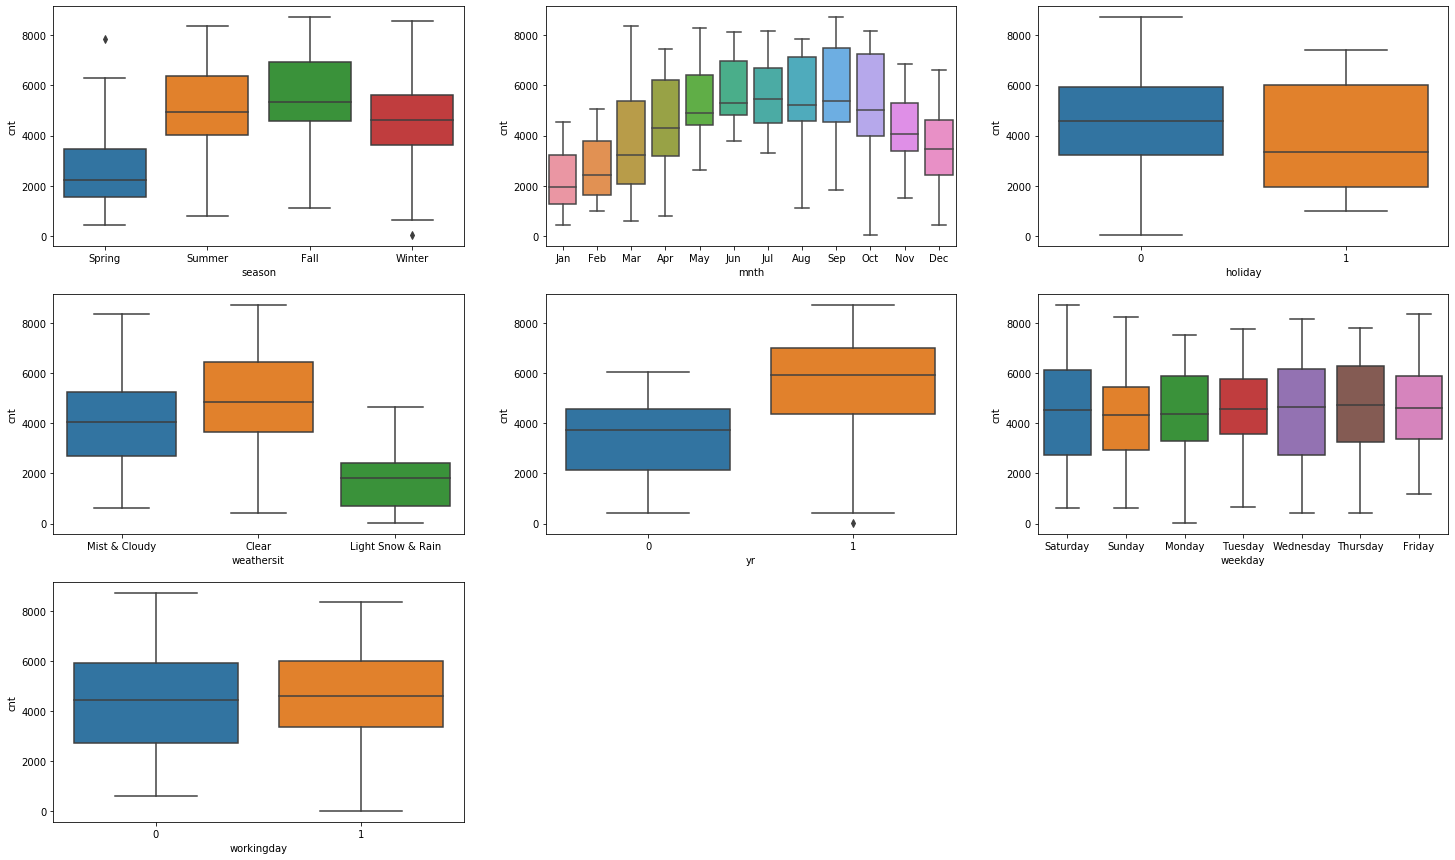

In [22]:
# BOXPLOTS TO UNDERSTAND CATEGORICAL VARIABLES
plt.figure(figsize=(25, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()

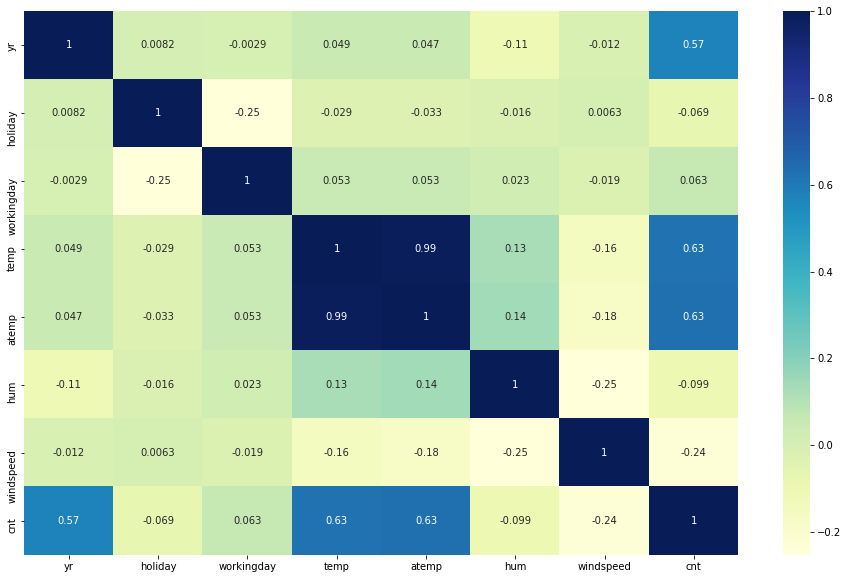

In [23]:
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(bike_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Dummy Variables

In [24]:
# Creating dummy variables
dummy_var = bike_data[['mnth','weekday','season','weathersit']]
dummy_var = pd.get_dummies(dummy_var,drop_first=True)

In [25]:
# Adding dummy variables to original dataset
bike_data = pd.concat([dummy_var,bike_data],axis = 1)
bike_data.head(15)

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Thursday,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Friday,1,Mist & Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sunday,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Monday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [26]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mnth_Aug                      730 non-null    uint8  
 1   mnth_Dec                      730 non-null    uint8  
 2   mnth_Feb                      730 non-null    uint8  
 3   mnth_Jan                      730 non-null    uint8  
 4   mnth_Jul                      730 non-null    uint8  
 5   mnth_Jun                      730 non-null    uint8  
 6   mnth_Mar                      730 non-null    uint8  
 7   mnth_May                      730 non-null    uint8  
 8   mnth_Nov                      730 non-null    uint8  
 9   mnth_Oct                      730 non-null    uint8  
 10  mnth_Sep                      730 non-null    uint8  
 11  weekday_Monday                730 non-null    uint8  
 12  weekday_Saturday              730 non-null    uint8  
 13  weekd

In [27]:
bike_data.shape

(730, 34)

In [28]:
## Dropping columns for which dummy variables were created
bike_data.drop(['mnth','weekday','season','weathersit'], axis = 1, inplace = True)
bike_data.head(15)

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,8.057402,10.44195,49.8696,11.304642,1510
7,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,6.765000,8.11270,53.5833,17.875868,959
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,5.671653,5.80875,43.4167,24.250650,822
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,6.184153,7.54440,48.2917,14.958889,1321


In [29]:
bike_data.shape

(730, 30)

In [30]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mnth_Aug                      730 non-null    uint8  
 1   mnth_Dec                      730 non-null    uint8  
 2   mnth_Feb                      730 non-null    uint8  
 3   mnth_Jan                      730 non-null    uint8  
 4   mnth_Jul                      730 non-null    uint8  
 5   mnth_Jun                      730 non-null    uint8  
 6   mnth_Mar                      730 non-null    uint8  
 7   mnth_May                      730 non-null    uint8  
 8   mnth_Nov                      730 non-null    uint8  
 9   mnth_Oct                      730 non-null    uint8  
 10  mnth_Sep                      730 non-null    uint8  
 11  weekday_Monday                730 non-null    uint8  
 12  weekday_Saturday              730 non-null    uint8  
 13  weekd

### Splitting the Data into Training and Testing Sets

In [31]:
np.random.seed(0)
train, test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
train.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


In [33]:
test.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,29.793347,33.27085,63.7917,5.459106,6043
535,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,32.082500,36.04875,59.2083,7.625404,6211
299,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,19.270000,22.85230,81.2917,13.250121,2659
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,31.433347,34.24915,42.4167,13.417286,4780
152,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,29.315000,32.19710,30.5000,19.583229,4968


In [34]:
train.columns

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Scaling the Numerical Data

In [35]:
scaler=MinMaxScaler()

In [36]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars=['cnt','hum','windspeed','temp','atemp']
train[num_vars] = scaler.fit_transform(train[num_vars])

In [37]:
train.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [38]:
train.describe()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# Dividing into X and Y sets for the model building
y_train = train.pop('cnt')
X_train = train

## Building a linear model

Fit a regression line through the training data using statsmodels. In statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [40]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [41]:
# Columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 5),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 4),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 15),
 ('season_Spring', True, 1),
 ('season_Summer', False, 3),
 ('season_Winter', True, 1),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', False, 12),
 ('windspeed', True, 1)]

### Model-1

In [42]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Saturday', 'season_Spring', 'season_Winter',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'windspeed'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Monday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'season_Summer', 'atemp',
       'hum'],
      dtype='object')

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [47]:
# Check the parameters obtained

lm.params

const                           0.249361
mnth_Dec                       -0.054009
mnth_Jan                       -0.057449
mnth_Jul                       -0.062082
mnth_Nov                       -0.049984
mnth_Sep                        0.052069
weekday_Saturday                0.059390
season_Spring                  -0.102606
season_Winter                   0.067516
weathersit_Light Snow & Rain   -0.300676
weathersit_Mist & Cloudy       -0.083182
yr                              0.234974
holiday                        -0.049434
workingday                      0.047267
temp                            0.400095
windspeed                      -0.155640
dtype: float64

In [48]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.30e-188
Time:                        03:56:10   Log-Likelihood:                 513.31
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [49]:
# Dropping holiday since it has p > 0.05

In [50]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

Rebuilding the model without 'holiday'

### Model-2

In [51]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [52]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.64e-189
Time:                        04:06:18   Log-Likelihood:                 511.64
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     495   BIC:                            -929.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Checking VIF for multicollinearity

In [54]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.87
13,temp,3.27
7,season_Spring,2.74
8,season_Winter,2.29
4,mnth_Nov,1.68
12,workingday,1.65
6,weekday_Saturday,1.64
2,mnth_Jan,1.63
1,mnth_Dec,1.44
3,mnth_Jul,1.30


In [55]:
# Droppping const, as we require VIF to be less than 5
X_train_new = X_train_new.drop(['const'], axis=1)

In [56]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,6.72
11,workingday,4.56
13,windspeed,4.17
7,season_Winter,2.56
6,season_Spring,2.45
10,yr,2.07
5,weekday_Saturday,1.82
3,mnth_Nov,1.77
1,mnth_Jan,1.67
9,weathersit_Mist & Cloudy,1.55


### Model-3

In [57]:
X_train_new = X_train_new.drop(['temp'], axis=1)

In [58]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [59]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.61e-161
Time:                        04:17:28   Log-Likelihood:                 441.88
No. Observations:                 510   AIC:                            -855.8
Df Residuals:                     496   BIC:                            -796.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [60]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,windspeed,3.51
11,workingday,3.19
7,season_Winter,2.56
6,season_Spring,2.31
10,yr,1.88
3,mnth_Nov,1.76
1,mnth_Jan,1.64
5,weekday_Saturday,1.55
9,weathersit_Mist & Cloudy,1.54
0,mnth_Dec,1.46


In [62]:
X_train_new.columns

Index(['mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Saturday', 'season_Spring', 'season_Winter',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'workingday', 'windspeed'],
      dtype='object')

### Model-4

In [63]:
# Dropping season_Winter since it has p > 0.05
X_train_new = X_train_new.drop(['season_Winter'], axis=1)

In [64]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [65]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     159.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.64e-162
Time:                        14:06:34   Log-Likelihood:                 441.61
No. Observations:                 510   AIC:                            -857.2
Df Residuals:                     497   BIC:                            -802.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [66]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,windspeed,3.48
10,workingday,3.14
6,season_Spring,2.11
9,yr,1.87
1,mnth_Jan,1.63
5,weekday_Saturday,1.54
8,weathersit_Mist & Cloudy,1.53
3,mnth_Nov,1.14
4,mnth_Sep,1.14
0,mnth_Dec,1.13


### Model-5

In [67]:
# Dropping mnth_Jul since it has p > 0.05
X_train_new = X_train_new.drop(['mnth_Jul'], axis=1)

In [68]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [69]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     174.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.49e-163
Time:                        14:08:11   Log-Likelihood:                 441.33
No. Observations:                 510   AIC:                            -858.7
Df Residuals:                     498   BIC:                            -807.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [70]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,windspeed,3.47
9,workingday,3.06
5,season_Spring,2.08
8,yr,1.86
1,mnth_Jan,1.63
4,weekday_Saturday,1.52
7,weathersit_Mist & Cloudy,1.52
2,mnth_Nov,1.13
0,mnth_Dec,1.12
3,mnth_Sep,1.12


## Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [71]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

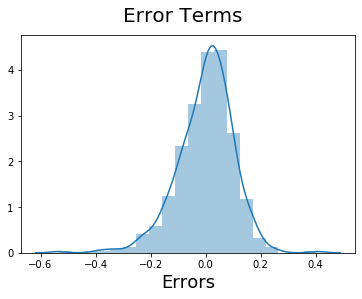

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Prediction

#### Applying the scaling on the test sets

In [73]:
num_vars = ['cnt','hum','windspeed','temp','atemp']
test[num_vars] = scaler.transform(test[num_vars])

In [74]:
test.describe()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [75]:
# Dividing into X_test and y_test

y_test = test.pop('cnt')
X_test = test

In [76]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [77]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   mnth_Dec                      219 non-null    uint8  
 2   mnth_Jan                      219 non-null    uint8  
 3   mnth_Nov                      219 non-null    uint8  
 4   mnth_Sep                      219 non-null    uint8  
 5   weekday_Saturday              219 non-null    uint8  
 6   season_Spring                 219 non-null    uint8  
 7   weathersit_Light Snow & Rain  219 non-null    uint8  
 8   weathersit_Mist & Cloudy      219 non-null    uint8  
 9   yr                            219 non-null    int64  
 10  workingday                    219 non-null    int64  
 11  windspeed                     219 non-null    float64
dtypes: float64(2), int64(2), uint8(8)
memory usage: 10.3 KB


In [78]:
# Making predictions using the sixth model

y_pred = lm.predict(X_test)

In [79]:
# R squared score
r2_score(y_test, y_pred)

0.7757592130422842

In [81]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.010650497396812232

## Model Evaluation

Text(0, 0.5, 'y_pred')

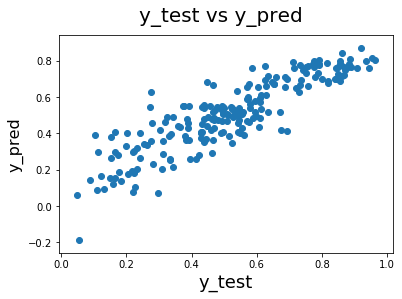

In [82]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [83]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
0,const,0.523449
9,yr,0.246369
4,mnth_Sep,0.073011
5,weekday_Saturday,0.066506
10,workingday,0.056291
8,weathersit_Mist & Cloudy,-0.092071
3,mnth_Nov,-0.094607
1,mnth_Dec,-0.106112
2,mnth_Jan,-0.121911


### We can see that the equation of our best fitted line is:

cnt = 0.523449 + 0.246369 X yr + 0.073011 X mnth_Sep + 0.066506 X weekday_Saturday + 0.056291 X workingday - 0.092071 X weathersit_Mist & Cloudy - 0.094607 X mnth_Nov - 0.106112 X mnth_Dec - 0.121911 X mnth_Jan - 0.208299 X windspeed - 0.220717 X season_Spring - 0.314764 X weathersit_Light Snow & Rain	

### We can see the demand for bikes depends mainly on below variables:

yr, mnth_Sep, weekday_Saturday, workingday, weathersit_Mist & Cloudy, mnth_Nov, mnth_Dec, mnth_Jan, windspeed, season_Spring, weathersit_Light Snow & Rain

### All the positive coefficients like yr, mnth_Sep indicate that an increase in these values will lead to an increase in the value of cnt.

### All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.

1. yr is the most significant with the largest coefficient.
2. Followed by weathersit_Light Snow & Rain.
3. Bike rentals is more for the month of september

This indicates that the bike rentals is majorly affected by year, month, weekday, workingday